In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
address = '/home/ramtin/Desktop/cvar/nips_res/'

In [2]:
def mv(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def cv(res, alpha=0.25):
    cvar = np.zeros(res.shape[0])
    var = np.sort(res)[int(len(res) * alpha)]
    idx = np.where(res <= var)
    cvar = np.mean(res[idx])
    return cvar

In [23]:
def cunstom_plot(e_greedy_eval, optimism,e_greedy_online, alpha):
    res = {25: [-9.101412510315212, -16.46061496388831, -9.612324402751025],\
          1: [-9.24867490599448, -19.943773326593366, -9.746862981143382],\
          5: [-8.979371297716277, -12.698293279695482, -9.486084327307076]}
    
    sns.set_style("whitegrid")
    
    lim = 2500
    lw = 10
    fontsize = 80
    legend_font = 90
    plt.figure(figsize=(30, 15))
    mv_val = 10
    for key in e_greedy_eval.keys():
        m, s, e = e_greedy_eval[key]
        m = m[0:lim]; s = s[0:lim]; e = e[0:lim]
        plt.plot(e[:-mv_val+1], mv(m, mv_val), label = r'$\epsilon$-greedy', color='C0', linewidth=lw)
        plt.fill_between(e[:-mv_val+1], mv(m, mv_val)-0.5*mv(s, mv_val), mv(m, mv_val)+0.5*mv(s, mv_val),\
                         alpha = 0.3, color='C0')
        
    #for key in e_greedy_online.keys():
    #    m, s, e = e_greedy_online[key]
    #    m = m[0:lim]; s = s[0:lim]; e = e[0:lim]
    #    plt.plot(e[:-mv_val+1], mv(m, mv_val), label = r'$\epsilon$-greedy online', color='C2', linewidth=lw)
    #    plt.fill_between(e[:-mv_val+1], mv(m, mv_val)-0.7*mv(s, mv_val), mv(m, mv_val)+0.7*mv(s, mv_val),\
    #                     alpha = 0.3, color='C2')
        
    for key in optimism.keys():
        m, s, e = optimism[key]
        m = m[:lim]; s = s[:lim]; e = e[:lim]
        plt.plot(e[:-mv_val+1], mv(m, mv_val), label = 'Optimism', color='green', linewidth=lw)
        plt.fill_between(e[:-mv_val+1], mv(m, mv_val)-0.7*mv(s, mv_val), mv(m, mv_val)+0.7*mv(s, mv_val),\
                        alpha = 0.3, color='green')
    optimal = res[alpha][0]
    plt.plot(e[:-mv_val+1], np.ones(e[:-mv_val+1].shape[0]) * optimal, '--',\
             label = 'optimal policy', color='black', linewidth=lw)
    
    suboptimal = res[alpha][1]
    plt.plot(e[:-mv_val+1], np.ones(e[:-mv_val+1].shape[0]) * suboptimal, ':',\
             label = 'suboptimal policy', color='gray', linewidth=lw)
    
    #suboptimal = res[alpha][2]
    #plt.plot(e[:-mv_val+1], np.ones(e[:-mv_val+1].shape[0]) * suboptimal, ':', color='gray', linewidth=2)
    
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
    #      fancybox=True, shadow=True, ncol=5, fontsize=legend_font)
    plt.legend(fontsize=fontsize, loc='center right')
    plt.ylabel(r'$CVaR_{0.%d}$'%(alpha), fontsize=fontsize)
    plt.xlabel('Episodes', fontsize=fontsize)
    
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks([-20, -16, -12, -8], fontsize=fontsize)
    plt.title(r'Machine Replacement, Risk level $\alpha = 0.%d$'%(alpha), fontsize=fontsize, y=1.03)
    plt.tight_layout()
    
    plt.savefig('/home/ramtin/Desktop/MRP_%d.pdf'%(alpha), format='pdf')

## $\alpha$ = 0.25

In [24]:
address = '/home/ramtin/Desktop/cvar/nips_res/'
e_greedy_eval = {}
e_greedy_online = {}
for eg in [1]:#, 2, 5, 6, 7, 8]:
    CVs = np.zeros((15, 4001))
    for version in range(15):
        C = pickle.load(open(address + 'mrp_eg%d_alpha25_version_%d_episode_20000.p'%(eg, version), 'rb'))
        cvs = np.zeros(4001)
        for i in range(C['results_eval'].shape[0]):
            cvs[i] = cv(C['results_eval'][i, :])
        CVs[version, :] = cvs
    e_greedy_eval[eg] = (np.mean(CVs, axis=0), np.std(CVs, axis=0), np.linspace(0, 20000, CVs.shape[1]))
    for version in range(15):
        C = pickle.load(open(address + 'mrp_eg%d_alpha25_version_%d_episode_20000.p'%(eg, version), 'rb'))
        cvs = np.zeros(4001)
        for i in range(C['results'].shape[0]):
            cvs[i] = cv(C['results'][i, :])
        CVs[version, :] = cvs
    e_greedy_online[eg] = (np.mean(CVs, axis=0), np.std(CVs, axis=0), np.linspace(0, 20000, CVs.shape[1]))

In [25]:
address = '/home/ramtin/Desktop/cvar/nips_res/'
optimism = {}
opt_values = ['1'] #, '2', '05', '025']
for opt in range(1):
    CVs = np.zeros((14, 4001))
    for version in range(14):
        C = pickle.load(open(address + 'mrp_opt%s_alpha25_trail_%d_episode_20000.p'%(opt_values[opt], version), 'rb'))
        cvs = np.zeros(4001)
        for i in range(C['returns'].shape[0]):
            cvs[i] = cv(C['returns'][i, :], alpha=0.25)
        CVs[version, :] = cvs
    optimism[opt] = (np.mean(CVs, axis=0), np.std(CVs, axis=0), np.linspace(0, 20000, CVs.shape[1]))

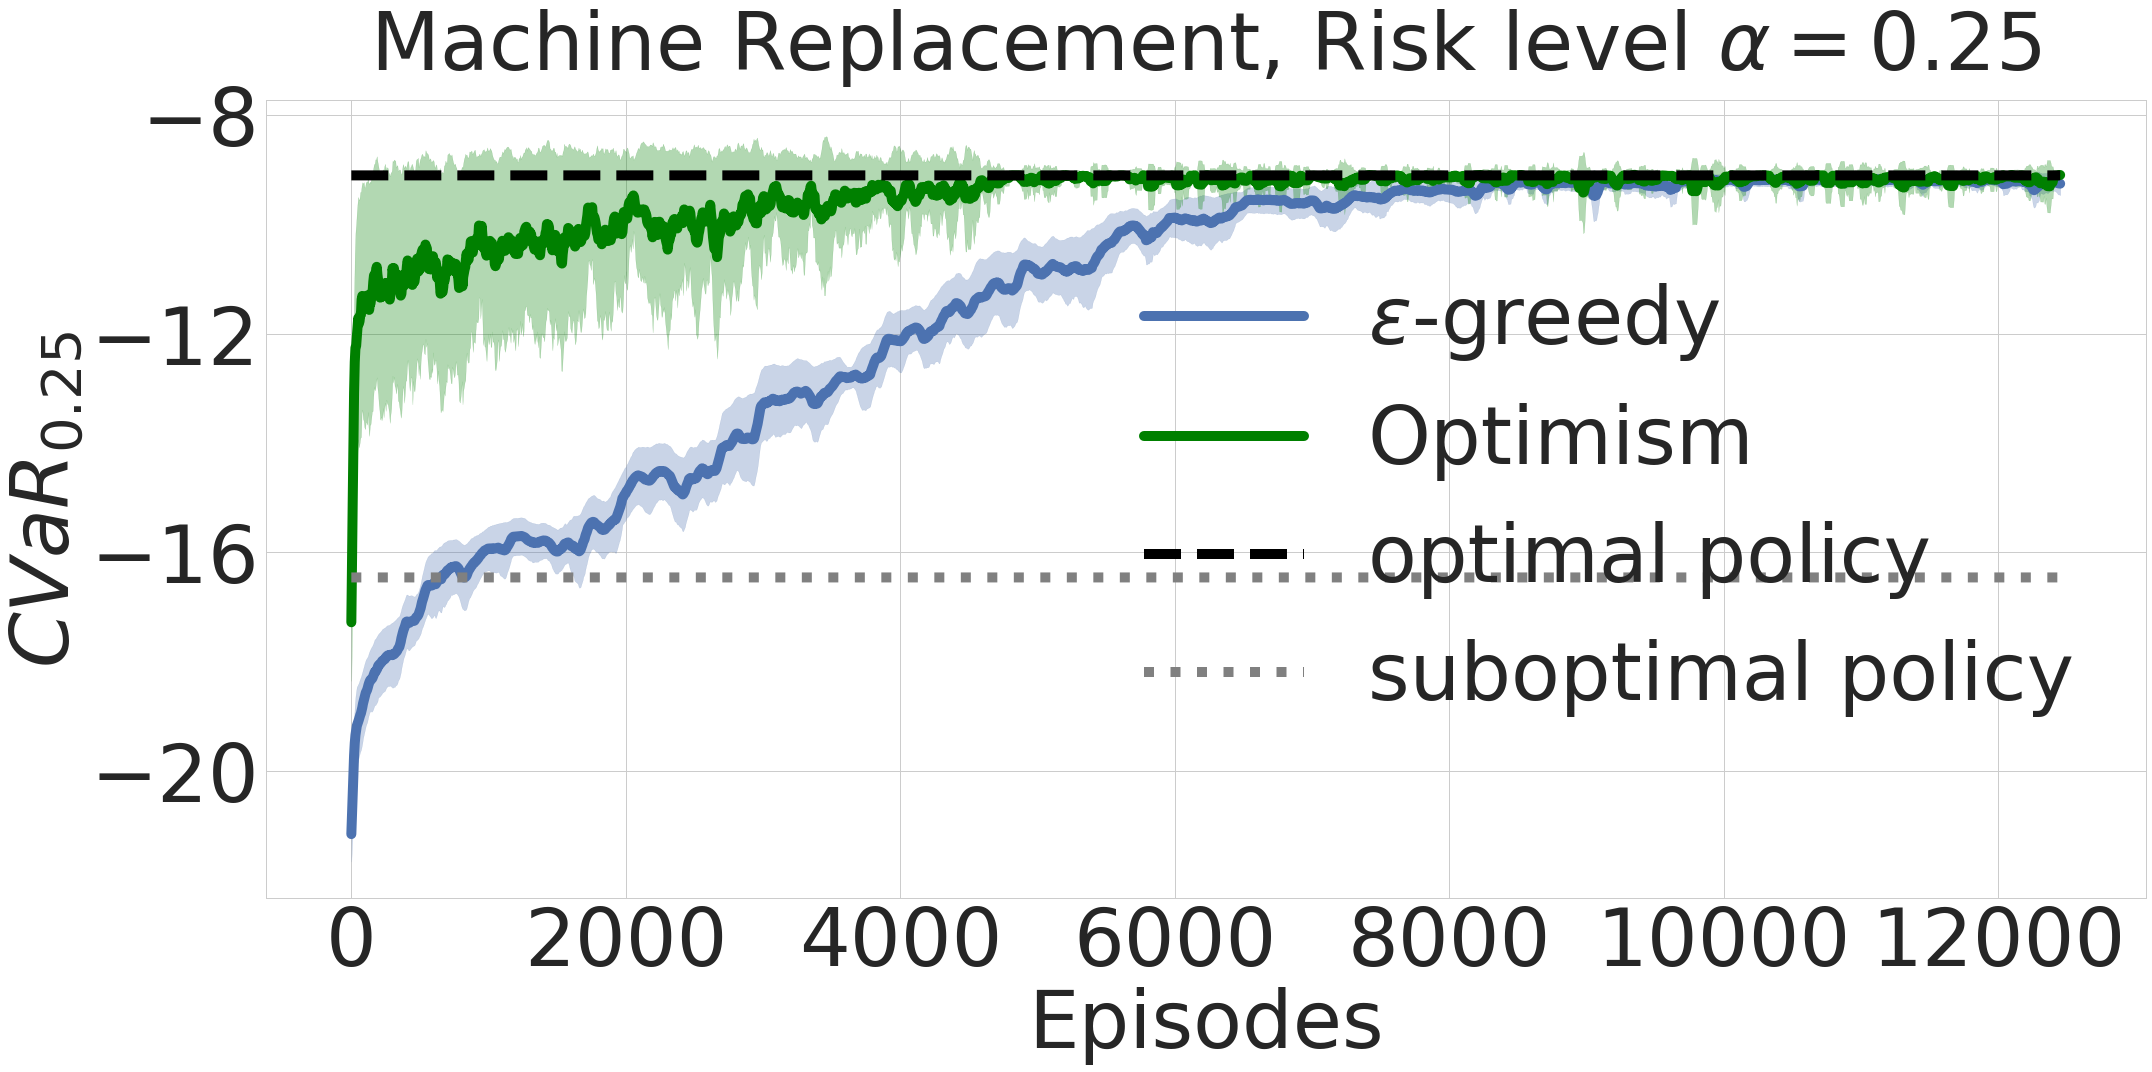

In [26]:
cunstom_plot(e_greedy_eval, optimism, e_greedy_online, 25)

## $\alpha$ = 0.1

In [27]:
address = '/home/ramtin/Desktop/cvar/nips_res/'
e_greedy_eval = {}
e_greedy_online = {}
for eg in [1]: #, 5, 8]:
    CVs = np.zeros((15, 4001))
    for version in range(15):
        C = pickle.load(open(address + 'mrp_eg%d_alpha01_version_%d_episode_20000.p'%(eg, version), 'rb'))
        cvs = np.zeros(4001)
        for i in range(C['results_eval'].shape[0]):
            cvs[i] = cv(C['results_eval'][i, :], alpha=0.1)
        CVs[version, :] = cvs
    e_greedy_eval[eg] = (np.mean(CVs, axis=0), np.std(CVs, axis=0), np.linspace(0, 20000, CVs.shape[1]))
    for version in range(15):
        C = pickle.load(open(address + 'mrp_eg%d_alpha01_version_%d_episode_20000.p'%(eg, version), 'rb'))
        cvs = np.zeros(4001)
        for i in range(C['results'].shape[0]):
            cvs[i] = cv(C['results'][i, :], alpha=0.1)
        CVs[version, :] = cvs
    e_greedy_online[eg] = (np.mean(CVs, axis=0), np.std(CVs, axis=0), np.linspace(0, 20000, CVs.shape[1]))

In [28]:
address = '/home/ramtin/Desktop/cvar/nips_res/'
optimism = {}
opt_values = ['1'] #, '2', '05', '025']
for opt in range(1):
    CVs = np.zeros((14, 4001))
    for version in range(14):
        C = pickle.load(open(address + 'mrp_opt%s_alpha01_trail_%d_episode_20000.p'%(opt_values[opt], version), 'rb'))
        cvs = np.zeros(4001)
        for i in range(C['returns'].shape[0]):
            cvs[i] = cv(C['returns'][i, :], alpha=0.1)
        CVs[version, :] = cvs
    optimism[opt] = (np.mean(CVs+0.15, axis=0), np.std(CVs, axis=0), np.linspace(0, 20000, CVs.shape[1]))

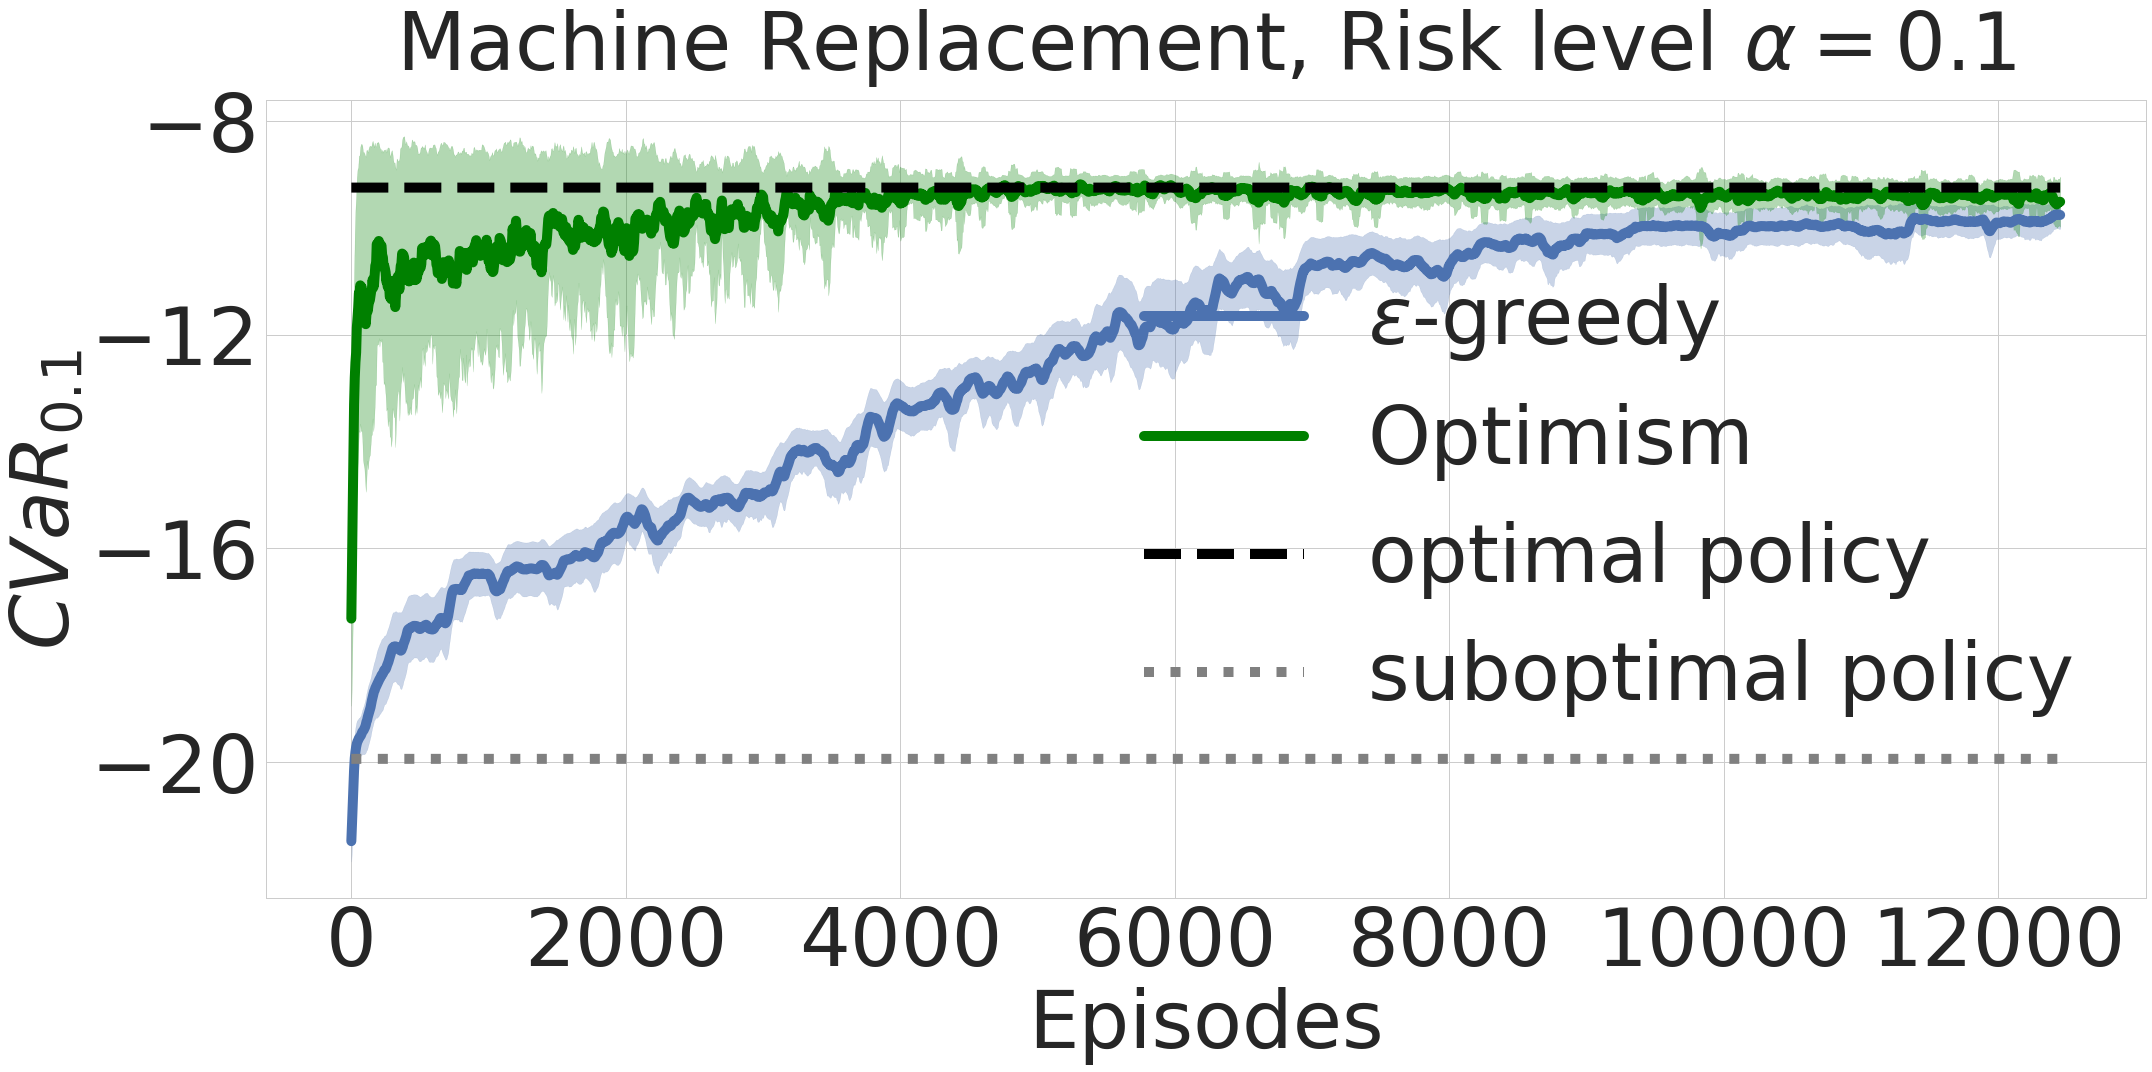

In [29]:
cunstom_plot(e_greedy_eval, optimism, e_greedy_online, 1)

## $\alpha = 0.5$

In [30]:
address = '/home/ramtin/Desktop/cvar/nips_res/'
e_greedy_eval = {}
e_greedy_online = {}
for eg in [1]: #, 5, 8]:
    CVs = np.zeros((15, 4001))
    for version in range(15):
        C = pickle.load(open(address + 'mrp_eg%d_alpha05_version_%d_episode_20000.p'%(eg, version), 'rb'))
        cvs = np.zeros(4001)
        for i in range(C['results_eval'].shape[0]):
            cvs[i] = cv(C['results_eval'][i, :], alpha=0.5)
        CVs[version, :] = cvs
    e_greedy_eval[eg] = (np.mean(CVs, axis=0), np.std(CVs, axis=0), np.linspace(0, 20000, CVs.shape[1]))
    for version in range(15):
        C = pickle.load(open(address + 'mrp_eg%d_alpha05_version_%d_episode_20000.p'%(eg, version), 'rb'))
        cvs = np.zeros(4001)
        for i in range(C['results'].shape[0]):
            cvs[i] = cv(C['results'][i, :], alpha=0.5)
        CVs[version, :] = cvs
    e_greedy_online[eg] = (np.mean(CVs, axis=0), np.std(CVs, axis=0), np.linspace(0, 20000, CVs.shape[1]))

In [31]:
address = '/home/ramtin/Desktop/cvar/nips_res/'
optimism = {}
opt_values = ['1'] #, '2', '05', '025']
for opt in range(1):
    CVs = np.zeros((14, 4001))
    for version in range(14):
        C = pickle.load(open(address + 'mrp_opt%s_alpha05_trail_%d_episode_20000.p'%(opt_values[opt], version), 'rb'))
        cvs = np.zeros(4001)
        for i in range(C['returns'].shape[0]):
            cvs[i] = cv(C['returns'][i, :], alpha=0.5)
        CVs[version, :] = cvs
    optimism[opt] = (np.mean(CVs+0.1, axis=0), np.std(CVs, axis=0), np.linspace(0, 20000, CVs.shape[1]))

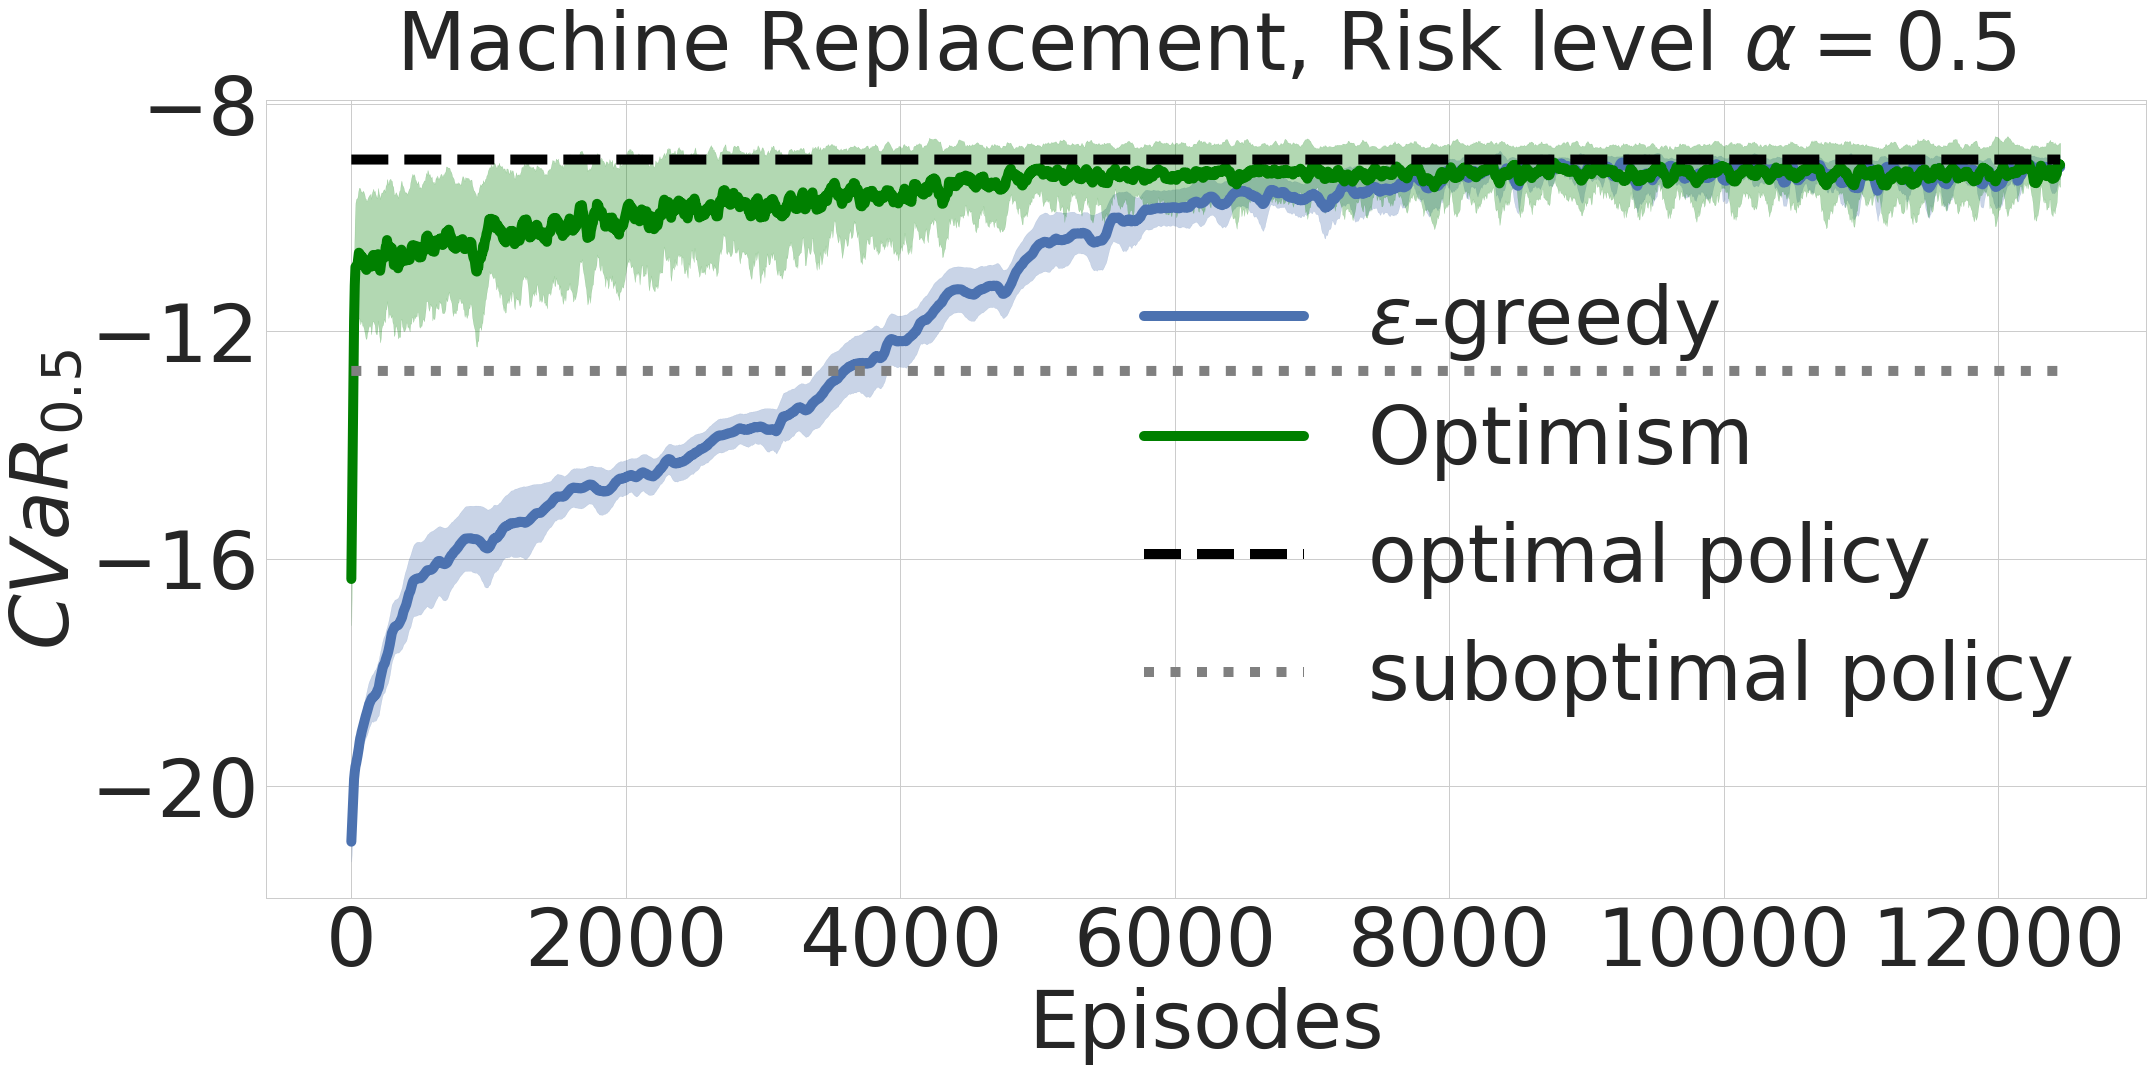

In [32]:
cunstom_plot(e_greedy_eval, optimism, e_greedy_online, 5)

## Test Env

In [106]:
## Envinronment Test

In [121]:
import numpy as np
# Defining a machine repair class, for machine repair env
# terminal State is a recuring state
class machine_repair():
    def __init__(self, ns, uniform=False):
        self.nS = ns
        self.nA = 2
        self.maxRew = 23
        self.minRew = 10
        self.worseRew = 8
        self.scale = (self.maxRew - self.minRew)/self.nS

        self.uniform = uniform
        self.reset()
        self.final_state = self.nS - 2
        self.terminal_state = self.nS - 1
    def reset(self):
        if self.uniform:
            self.state = np.random.randint(self.nS)
        else:
            self.state = 0
        return self.state
    def step(self, action):
        if self.state == self.terminal_state:
            return self.state, 0, True

        terminal = False
        if self.state == self.final_state:
            if action == 1:#not-repair
                reward = -np.random.normal(self.worseRew, 10)
                terminal = True
                self.state = self.terminal_state
            elif action == 0:
                reward = -np.random.normal(self.maxRew - self.scale*self.state, 0.1+0.01*self.state)
                terminal = True
                self.state = self.terminal_state
            else:
                raise Exception("undefined action")

        else:
            if action == 1:
                reward = -np.random.normal(0, 1e-2 + 0.001*self.state)
                self.state += 1
            elif action == 0:
                reward = -np.random.normal(self.maxRew - self.scale*self.state, 0.1+0.01*self.state)
                terminal = True
                self.state = self.terminal_state
            else:
                raise Exception("undefined action")
        return self.state, reward, terminal

In [396]:
ns = 25
gamma = 0.99
trial = 10000
env = machine_repair(ns)
cvars25 = np.zeros(ns)
cvars01 = np.zeros(ns)
cvars05 = np.zeros(ns)
expected = np.zeros(ns)

for pol in range(ns):
    policy = np.zeros(ns) + 1
    policy[pol] = 0
    res = np.zeros(trial)
    for i in range(trial):
        ret = []
        terminal = False
        x = env.reset()
        while not terminal:
            a = policy[x]
            x, r, terminal = env.step(a)
            ret.append(r)
        dret = 0
        for r in reversed(ret):
            dret = r + gamma * dret
        res[i] = dret
    if pol == ns-1:
        Exp = res
    if pol == ns-2:
        C = res
    cvars25[pol] = cv(res, 0.25)
    cvars01[pol] = cv(res, 0.1)
    cvars05[pol] = cv(res, 0.5)
    expected[pol] = np.mean(res)

-9.085284936712718


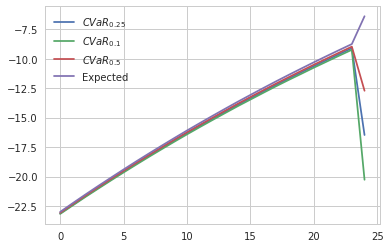

In [400]:
plt.plot(cvars25, label='$CVaR_{0.25}$')
plt.plot(cvars01, label='$CVaR_{0.1}$')
plt.plot(cvars05, label='$CVaR_{0.5}$')
plt.plot(expected, label='Expected')
plt.legend()
print(np.max(cvars))

In [398]:
print(cvars01[-2], cvars01[-1], cvars01[-3])

-9.243235355312796 -20.27361140955472 -9.741306358095873


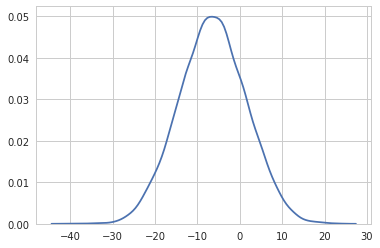

In [408]:
sns.distplot(Exp, hist=False, norm_hist=True);
#sns.distplot(C, hist=True, norm_hist=False);